In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
%matplotlib inline

In [2]:
# clean all files to text files
def maketxt(folder):
    listdir=os.listdir(folder)
    count=0
    for path in listdir:
        if not path.endswith(".txt") and os.path.isfile(os.path.join(folder,path)):
            print("adding .txt to : ",path)
            os.rename(os.path.join(folder,path),os.path.join(folder,path+".txt"))
            count+=1
    print(count,"files textified")

def npcombinesweep(path1,path2):
    data1=np.genfromtxt(path1,skip_header=1)
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    
    data2=np.genfromtxt(path2,skip_header=1)
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
    os.path.splitext(path1)[0][:-2]+".txt"
    os.remove(path1)
    os.remove(path2)

def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2 where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    #gets a list of all the paths in the target folder
    listdir=os.listdir(folder)       
    count=0
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1:
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join(folder,path),os.path.join(folder,path2)]
                    else:
                        combine=[os.path.join(folder,path2),os.path.join(folder,path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    count+=1
                    listdir.remove(path)
                    listdir.remove(path2)
    print(count,"file pairs combined")

def plotsweepsback(ax,paths,title):
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()    
    
def plotsweepstop(ax,paths,title,labels="",colors='',xlabel="Vg (Volts)"):
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[35:35+path[35:].find('u')])
        elif len(labels)==len(paths)==len(colors):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)],color=colors[paths.index(path)])
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()

In [6]:
maketxt("215GT")
checkduplicates("215GT")  

0 files textified
0 file pairs combined


In [10]:
maketxt("235RC")
checkduplicates("235RC")  

0 files textified
0 file pairs combined


In [13]:
maketxt("208E")
checkduplicates("208E")  

0 files textified
0 file pairs combined


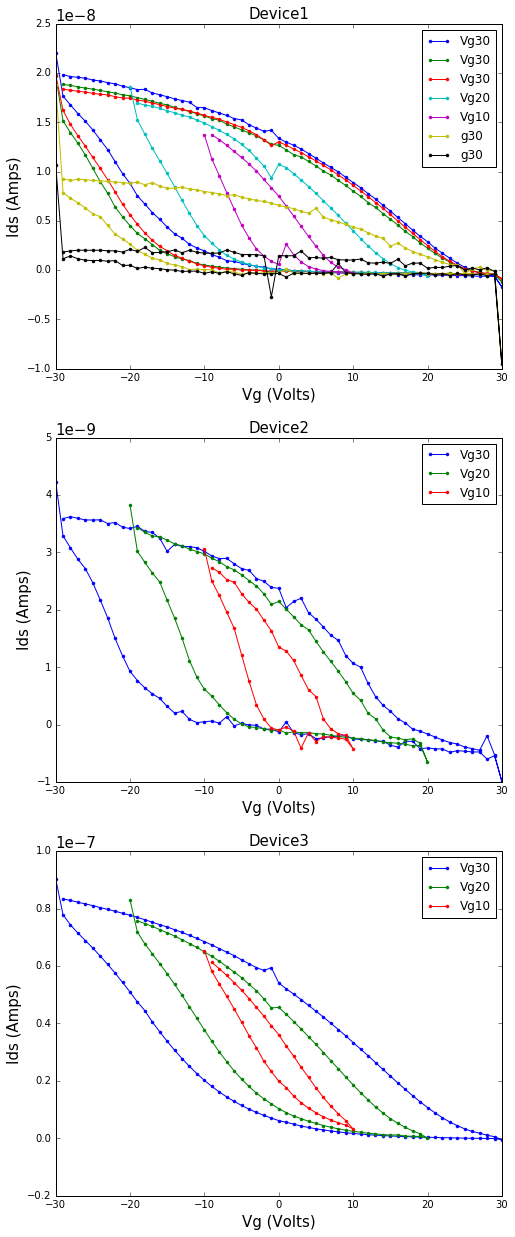

In [5]:
paths1,paths2,paths3=[],[],[]
folder="215GT"
listdir=os.listdir(folder)
for path in listdir:
    if "VgIds" in path and not "top" in path:
        if  "01-12" in path:
            paths1.append(os.path.join(folder,path))
        if  "03-10" in path:
            paths2.append(os.path.join(folder,path))
        if  "05-08" in path and "2016-07-12" in path:
            paths3.append(os.path.join(folder,path))
# def printlist(inlist):
#     for i in inlist:
#         print (i)
# print("paths1")
# printlist(paths1)
# print("paths2")
# printlist(paths2)

fig=plt.figure(figsize=(8,21))
ax1=plt.subplot(311)
plotsweepstop(ax1,paths1,"Device1")#,labels=labels1,colors=colors1)
ax2=plt.subplot(312)
plotsweepstop(ax2,paths2,"Device2")
ax3=plt.subplot(313)
plotsweepstop(ax3,paths3,"Device3")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax3.yaxis.get_offset_text()
offset_text.set_size(15)


# fig.savefig(os.path.join("plots",) format="jpg")


paths1
215GT/215GT_pin05-08_VgIds_Vds10mV_Vg30updown_2016-07-12_run6.txt
215GT/215GT_pin05-08_VgIds_Vds10mV_Vg20updown_2016-07-12_run5.txt
215GT/215GT_pin05-08_VgIds_Vds10mV_Vg10updown_2016-07-12_run4.txt
paths2
215GT/215GT_pin05-08_VgIds_Vds10mV_Vg30updown_2016-07-11_run12.txt
215GT/215GT_pin03-10_VgIds_Vds10mV_Vg30updown_2016-07-11_run9.txt
215GT/215GT_pin01-12_VgIds_Vds10mV_Vg30updown_2016-07-11_run6.txt


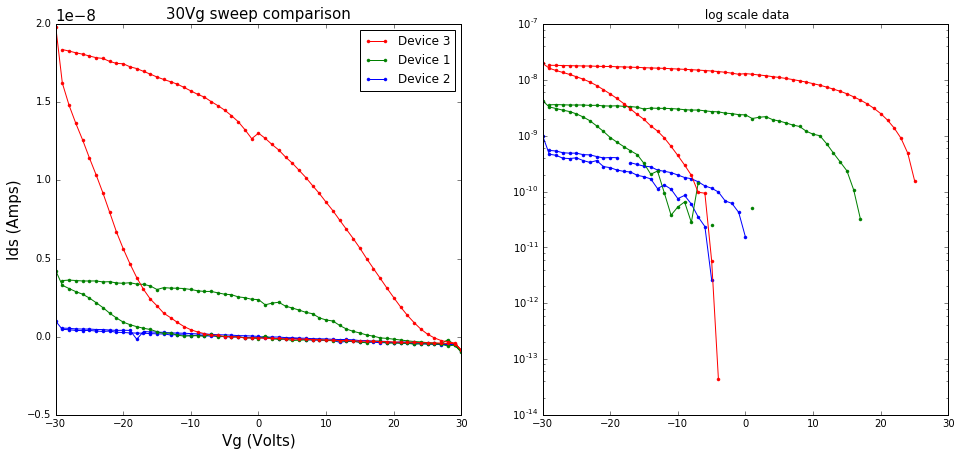

In [7]:
paths1,paths2=[],[]
folder="215GT"
listdir=os.listdir(folder)
for path in listdir:
    if "VgIds" in path:
        if  "05-08" in path and "2016-07-12" in path:
            paths1.append(os.path.join(folder,path))
        if  "Vg30" in path and "2016-07-11" in path:
            paths2.append(os.path.join(folder,path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
print("paths2")
printlist(paths2)

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
# plotsweepstop(ax1,paths1,"Device 3")#,labels=labels1,colors=colors1)
for path in paths2[:3]:
    data= np.genfromtxt(path,skip_header=1)
    ax2.semilogy(data[:,0],data[:,1],".-")
#     ax2.set_ylim([1e-11,1e-7])
    ax2.set_title(" log scale data")


plotsweepstop(ax1,paths2[:3],"30Vg sweep comparison",labels=["Device 2", "Device 1", "Device 3"])
#reverse legend order
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])


offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)




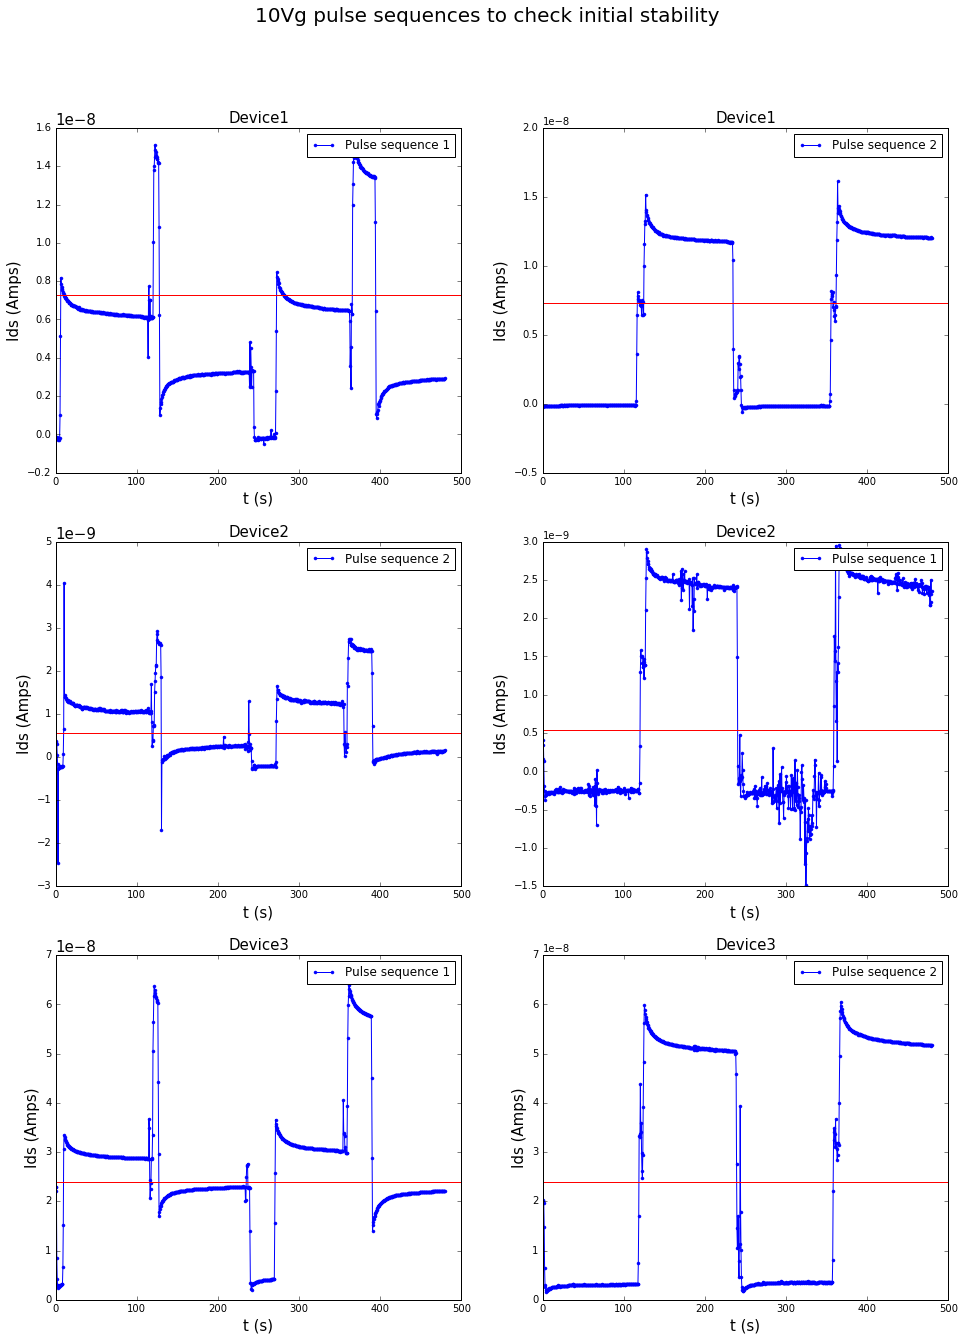

In [7]:
paths1,paths2,paths3=[],[],[]
folder="215GT"
listdir=os.listdir(folder)
for path in listdir:
    if "IdsT" in path and "pulse" in path:
        if  "01-12" in path:
            paths1.append(os.path.join(folder,path))
        if  "03-10" in path:
            paths2.append(os.path.join(folder,path))
        if  "05-08" in path :
            paths3.append(os.path.join(folder,path))
# def printlist(inlist):
#     for i in inlist:
#         print (i)
# print("paths1")
# printlist(paths1)
# print("paths2")
# printlist(paths2)

fig=plt.figure(figsize=(16,21))
ax1=plt.subplot(321)
plotsweepstop(ax1,["215GT/215GT_pin01-12_IdsT_Vds10mV_Vg10pulse1_2016-07-11_run17.txt"],
              "Device1",xlabel="t (s)",labels=["Pulse sequence 1"])
ax1.axhline(7.290243333333334e-09,color='r')
ax2=plt.subplot(323)
plotsweepstop(ax2,["215GT/215GT_pin03-10_IdsT_Vds10mV_Vg10pulse1_2016-07-11_run19.txt"],
              "Device2",xlabel="t (s)",labels=["Pulse sequence 2"])
ax2.axhline(5.4555833333333338e-10,color='r')
ax3=plt.subplot(325)
plotsweepstop(ax3,["215GT/215GT_pin05-08_IdsT_Vds10mV_Vg10pulse1_2016-07-11_run20.txt"],
              "Device3",xlabel="t (s)",labels=["Pulse sequence 1"])
ax3.axhline(2.3953903333333332e-08,color='r')
ax4=plt.subplot(322)
plotsweepstop(ax4,["215GT/215GT_pin01-12_IdsT_Vds10mV_Vg10pulse2_2016-07-11_run18.txt"],
              "Device1",xlabel="t (s)",labels=["Pulse sequence 2"])
ax4.axhline(7.290243333333334e-09,color='r')
ax5=plt.subplot(324)
plotsweepstop(ax5,["215GT/215GT_pin03-10_IdsT_Vds10mV_Vg10pulse2_2016-07-11_run16.txt"],
              "Device2",xlabel="t (s)",labels=["Pulse sequence 1"])
ax5.axhline(5.4555833333333338e-10,color='r')
ax6=plt.subplot(326)
plotsweepstop(ax6,["215GT/215GT_pin05-08_IdsT_Vds10mV_Vg10pulse2_2016-07-11_run14.txt"],
              "Device3",xlabel="t (s)",labels=["Pulse sequence 2"])
ax6.axhline(2.3953903333333332e-08,color='r')

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax3.yaxis.get_offset_text()
offset_text.set_size(15)
fig.suptitle("10Vg pulse sequences to check initial stability",fontsize=20)


# fig.savefig(os.path.join("plots",) format="jpg")


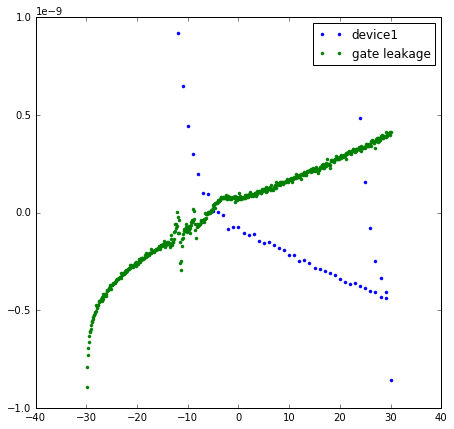

In [8]:
data1=np.genfromtxt("215GT/215GT_pin01-12_VgIds_Vds10mV_Vg30updown_2016-07-11_run6.txt",skip_header=1)
data2=np.genfromtxt("215GT/215GT_pin07-12_leakagecheckIV_2106-07-12_run7.txt")
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1],'.',label="device1")
ax1.plot(data2[:,0],data2[:,1],'.',label="gate leakage")
ax1.set_ylim([-1e-9,1e-9])
ax1.legend()


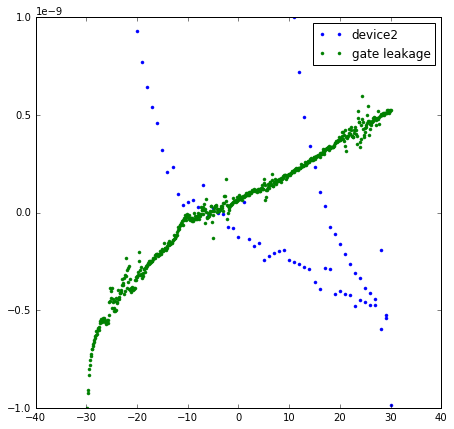

In [9]:
data1=np.genfromtxt("215GT/215GT_pin03-10_VgIds_Vds10mV_Vg30updown_2016-07-11_run9.txt",skip_header=1)
data2=np.genfromtxt("215GT/215GT_pin07-10_leakagecheckIV_2106-07-12_run8.txt")
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1],'.',label="device2")
ax1.plot(data2[:,0],data2[:,1],'.',label="gate leakage")
ax1.set_ylim([-1e-9,1e-9])
ax1.legend()

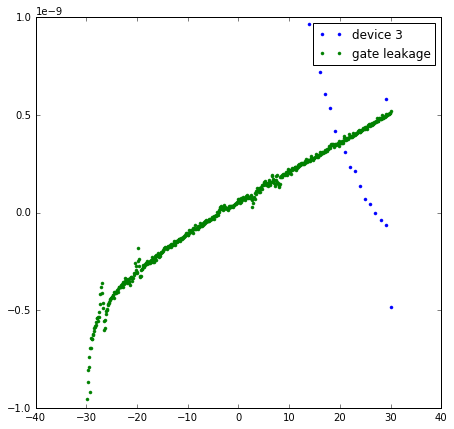

In [10]:
data1=np.genfromtxt("215GT/215GT_pin05-08_VgIds_Vds10mV_Vg30updown_2016-07-12_run6.txt",skip_header=1)
data2=np.genfromtxt("215GT/215GT_pin07-08_leakagecheckIV_2106-07-12_run9.txt")
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1],'.',label="device 3")
ax1.plot(data2[:,0],data2[:,1],'.',label="gate leakage")
ax1.set_ylim([-1e-9,1e-9])
ax1.legend()

paths1
215GT/215GT_pin01-12_VgIds_Vds10mV_Vg0_pin13Vtop20updown_2016-07-13_run7.txt
215GT/215GT_pin01-12_VgIds_Vds10mV_Vg0_pin02Vtop20updown_2016-07-13_run6.txt
215GT/215GT_pin01-12_VgIds_Vds10mV_Vg0_pin02-13Vtoppinch20updown_2016-07-13_run5.txt
paths2
215GT/215GT_pin03-10_VgIds_Vds10mV_Vg0_pin11Vtop20updown_2016-07-13_run13.txt
215GT/215GT_pin03-10_VgIds_Vds10mV_Vg0_pin04Vtop20updown_2016-07-13_run12.txt
215GT/215GT_pin03-10_VgIds_Vds10mV_Vg0_pin04-11Vtoppinch20updown_2016-07-13_run11.txt


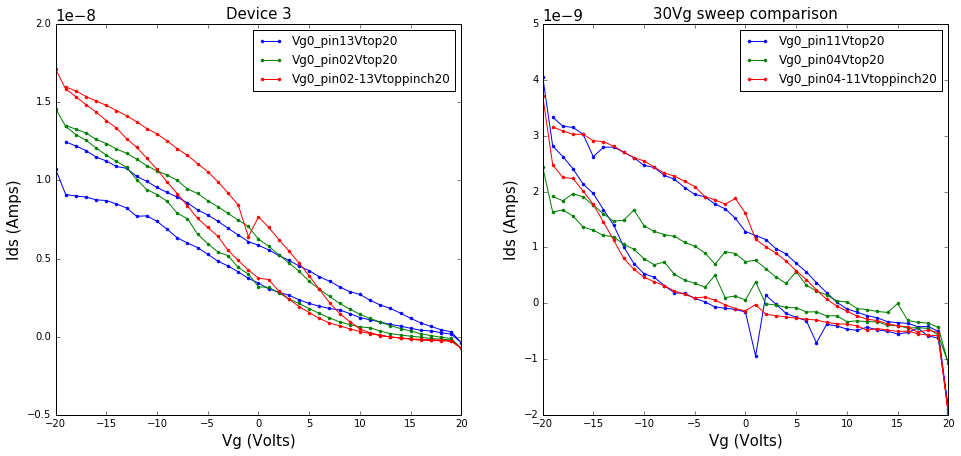

In [6]:

paths1,paths2=[],[]
folder="215GT"
listdir=os.listdir(folder)
for path in listdir:
    if "top" in path:
        if  "20updown" in path and "01-12" in path :
            paths1.append(os.path.join(folder,path))
        if  "20updown" in path and "03-10" in path:
            paths2.append(os.path.join(folder,path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
print("paths2")
printlist(paths2)
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
plotsweepstop(ax1,paths1,"Device 3")#,labels=labels1,colors=colors1)


plotsweepstop(ax2,paths2,"30Vg sweep comparison")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

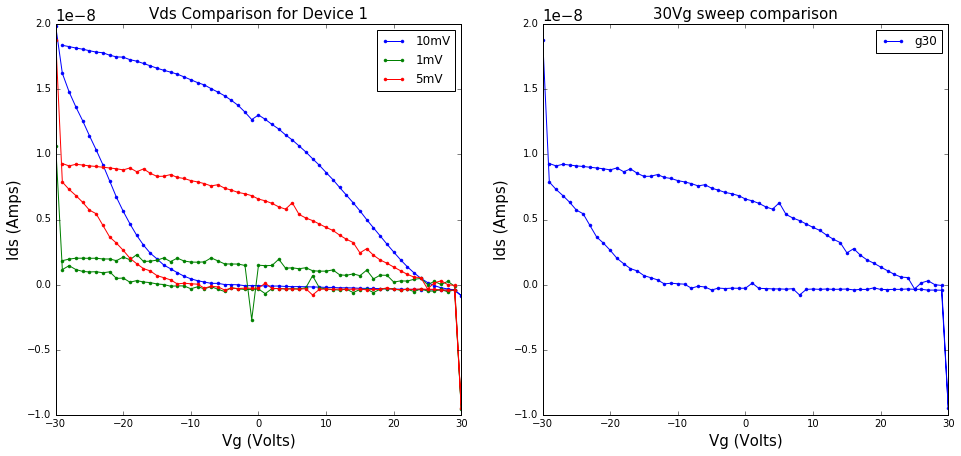

In [8]:

paths1,paths2=[

    "215GT/215GT_pin01-12_VgIds_Vds10mV_Vg30updown_2016-07-11_run6.txt",
    "215GT/215GT_pin01-12_VgIds_Vds1mV_Vg30updown_2016-07-12_run17.txt",
    "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg30updown_2016-07-12_run18.txt"
    ],[
        "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg30updown_2016-07-12_run18.txt"
]

labels1=[
    "10mV",
    "1mV",
    "5mV"
]
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
plotsweepstop(ax1,paths1,"Vds Comparison for Device 1",labels=labels1)#,labels=labels1,colors=colors1)


plotsweepstop(ax2,paths2,"30Vg sweep comparison")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# ax2.set_ylim([-3e-9,3e-9])

(-4e-10, 1e-08)

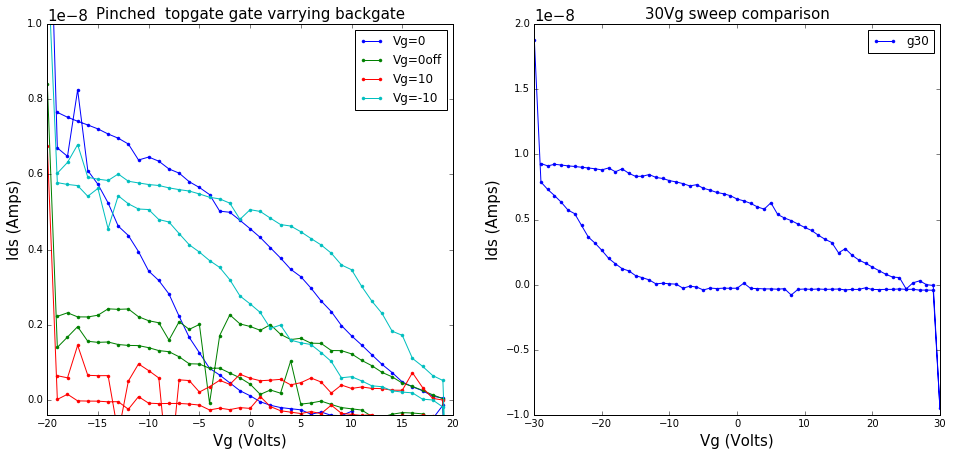

In [10]:

paths1,paths2=[

    "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg0_pin02-13Vtoppinch20updown_2016-07-13_run19.txt",
    "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg0off_pin02-13Vtoppinch20updown_2016-07-13_run20.txt",
    "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg10_pin02-13Vtoppinch20updown_2016-07-13_run21.txt",
    "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg-10_pin02-13Vtoppinch20updown_2016-07-13_run22.txt"
    
    ],[
        "215GT/215GT_pin01-12_VgIds_Vds5mV_Vg30updown_2016-07-12_run18.txt"
]

labels1=[
    "Vg=0",
    "Vg=0off",
    "Vg=10",
    "Vg=-10"
    
]
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
plotsweepstop(ax1,paths1,"Pinched  topgate gate varrying backgate",labels=labels1)#,labels=labels1,colors=colors1)


plotsweepstop(ax2,paths2,"30Vg sweep comparison")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

ax1.set_ylim([-0.04e-8,1e-8])